# SOFTMAX REGRESSION

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#This softmax can be overflow if Z is big
def softmax(Z):
    e_X = np.exp(Z)
    return e_Z / e_Z.sum(axis=1, keepdims=True)

#Stable Softmax
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return e_Z / e_Z.sum(axis=1, keepdims=True)


## Loss Function

**Cross Entropy**

```Loss = -(y_actual).ln(y_predict) - (1-y_actual).ln(1-y_predict)```

In [2]:
 def softmax_loss(X, y, w):
    A= softmax_stable(X.dot(w))
    id0 = range(X.shape[0]) #indexes in axis0 
    return -np.mean(np.log(A[id0, y]))

## Optimizer

In [3]:
def softmax_grad(X, y, w):
    A = softmax_stable(X.dot(w)) #Shape of (N, C)
    id0 = range(X.shape[0])
    A[id0, y] -= 1 #A - Y Shape of (N, C)
    return X.T.dot(A)/X.shape[0]

def softmax_fit(W, X, y, lr=0.01, n_epoches=100, to1=1e-5, batch_size=10):
    W_old = W.copy()
    ep = 0
    loss_hist = [softmax_loss(X, y, W)]
    N = X.shape[0]
    nbatches = int(np.ceil(float(N)/batch_size))
    while ep < n_epoches:
        ep +=1 
        mix_ids = np.random.permutation(N) # mix data
        for i in range(nbatches):
            batch_ids = mix_ids[batch_size*i:min(batch_size*(i+1), N)]
            X_batch, y_batch = X[batch_ids], y[batch_ids]
            W -= lr*softmax_grad(X_batch, y_batch, W)
        loss_hist.append(softmax_loss(X, y, W))
        if np.linalg.norm(W - W_old)/W.size < to1:
            break
        W_old = W.copy()
    return W, loss_hist    

In [4]:
C, N = 5, 200
means = [[2, 2], [8, 3], [3, 6], [14, 2], [12, 8]]
cov = [[1, 0], [0, 1]]
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
X4 = np.random.multivariate_normal(means[4], cov, N)
X = np.concatenate((X0, X1, X2, X3, X4), axis = 0)
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

y = np.asarray([0]*N + [1]*N + [2]*N + [3]*N + [4]*N)
W_init = np.random.randn(Xbar.shape[1], C)

In [5]:
W1, loss = softmax_fit(W_init, Xbar, y, batch_size=10, n_epoches=100, lr=0.05)

W1

array([[-0.84653957,  0.77738089, -1.17175678,  1.81182569,  0.51576432],
       [-1.19391513, -1.70858378,  1.65445036, -2.91433398,  0.58185283],
       [ 9.08047421,  2.84738358, -1.5864881 , -5.18284217, -5.95953025]])

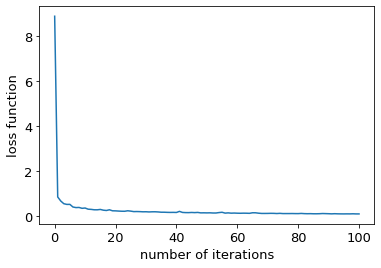

In [6]:
plt.plot(loss)
plt.xlabel('number of iterations', fontsize = 13)
plt.ylabel('loss function', fontsize = 13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()